In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

#print(hists['recoil'].identifiers('dataset'))
#print(hists['recoil'].project('dataset', 'MonoHs_Mzprime_500_Mhs_90_Mchi_150____0').values(overflow='all'))
pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

MonoHs_Mzprime_500_Mhs_50_Mchi_150 291434.97568933247
MonoHs_Mzprime_500_Mhs_70_Mchi_150 296860.10388287954
MonoW_Mzprime_500_Mchi_150 288972.9883940001
MonoJet_Mzprime_500_Mchi_150 308220.12705355155
MonoHs_Mzprime_500_Mhs_90_Mchi_150 297390.7091100481
MonoZ_Mzprime_500_Mchi_150 292182.6719517814


In [3]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

signal_hists = {}
signal_cats = ("pdataset",)
signal_map = OrderedDict() ### for signal samples
signal_map["Mhs_50"] = ("*Mhs_50*",)  ## signals
signal_map["Mhs_70"] = ("*Mhs_70*",)
signal_map["Mhs_90"] = ("*Mhs_90*",)
signal_map["MonoJet"] = ("MonoJet*",)  ## signals
signal_map["MonoW"] = ("MonoW*",)    ## signals
signal_map["MonoZ"] = ("MonoZ*",)    ## signals

for key in hists.keys():
    signal_hists[key] = hists[key].group(process, signal_cats, signal_map)
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    
#print(hists['recoil'].identifiers('process'))

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
nftot
nfjgood
nfjclean
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TvsQCD
hSvsQCD
VvsQCD
probTbcq
probTbqq
probTbc
probTbq
probWcq
probWqq
probZbb
probZcc
probZqq
probHbb
probHcc
probHqqqq
probQCDbb
probQCDcc
probQCDb
probQCDc
probQCDothers


In [4]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [5]:
##### http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12 : colors
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Attempting to set identical bottom == top == 15.000000000000004 results in singular transformations; automatically expanding.
  


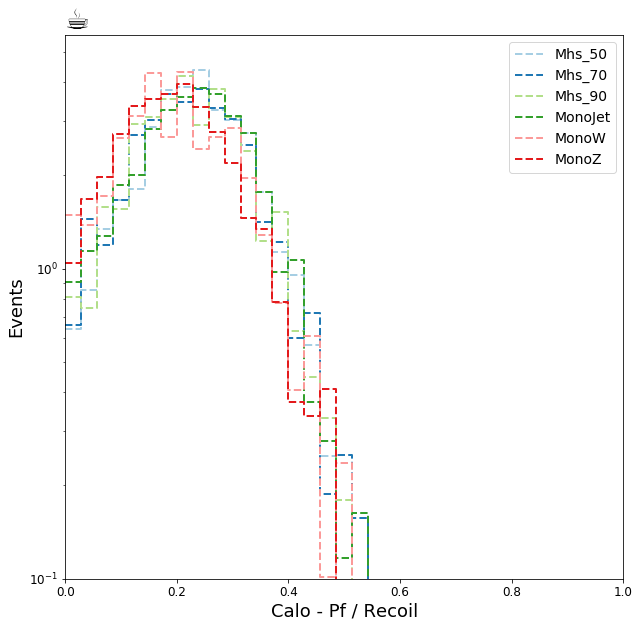

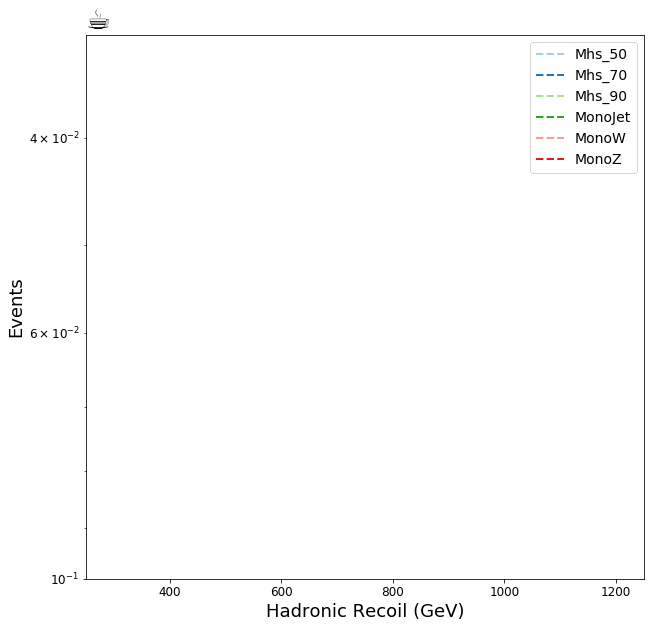

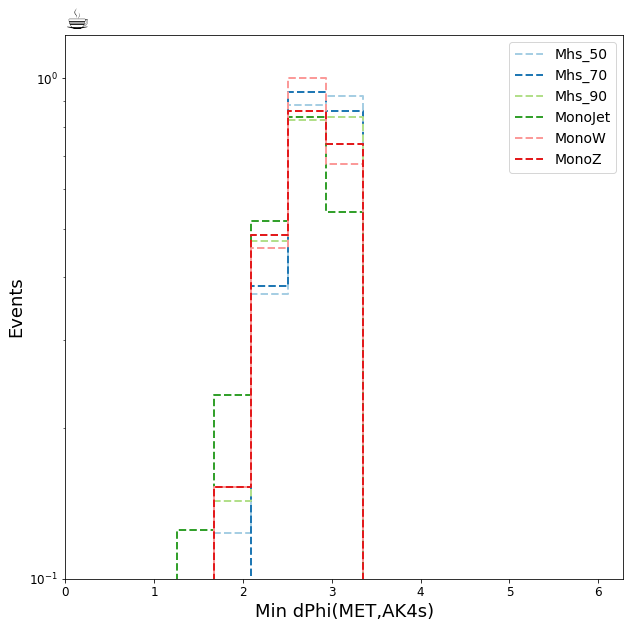

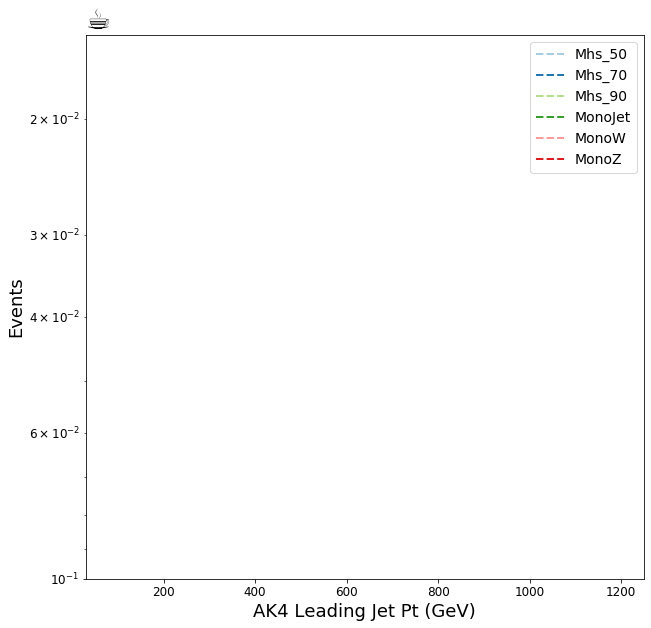

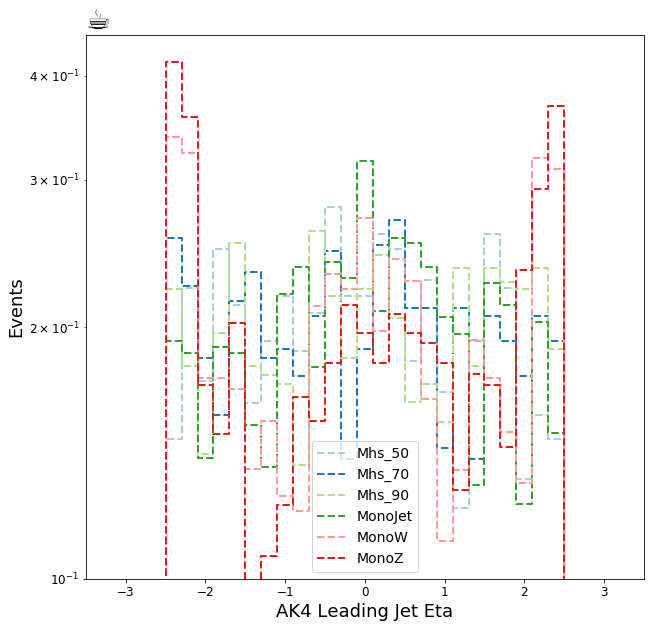

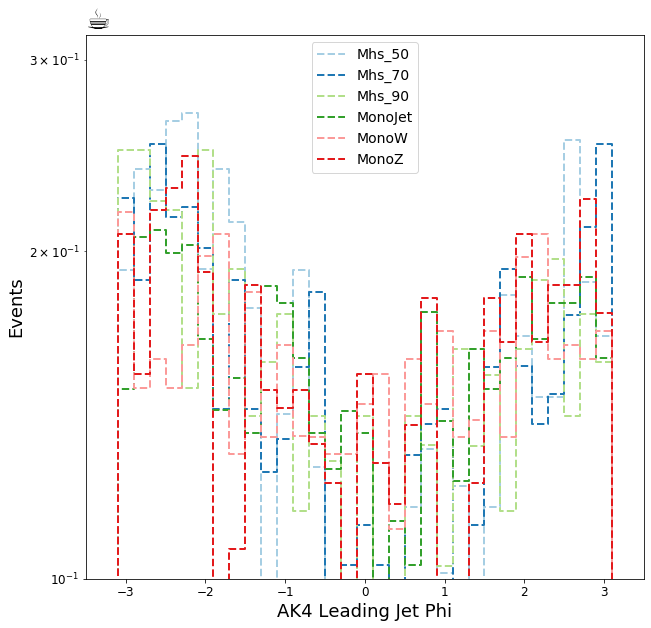

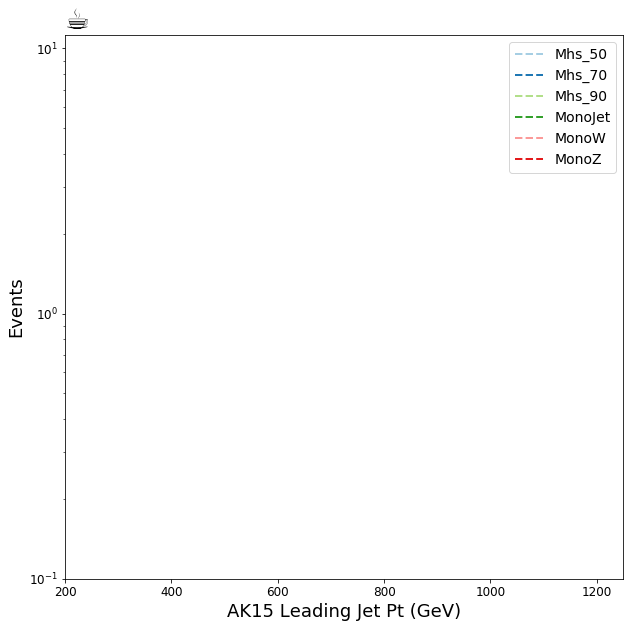

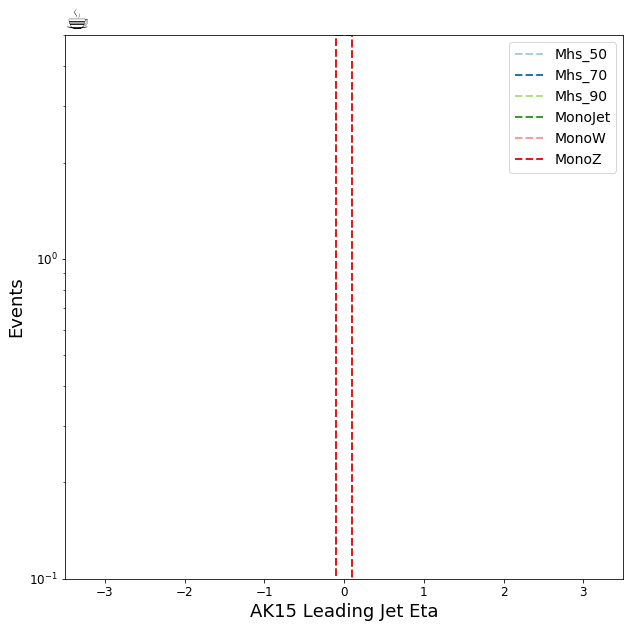

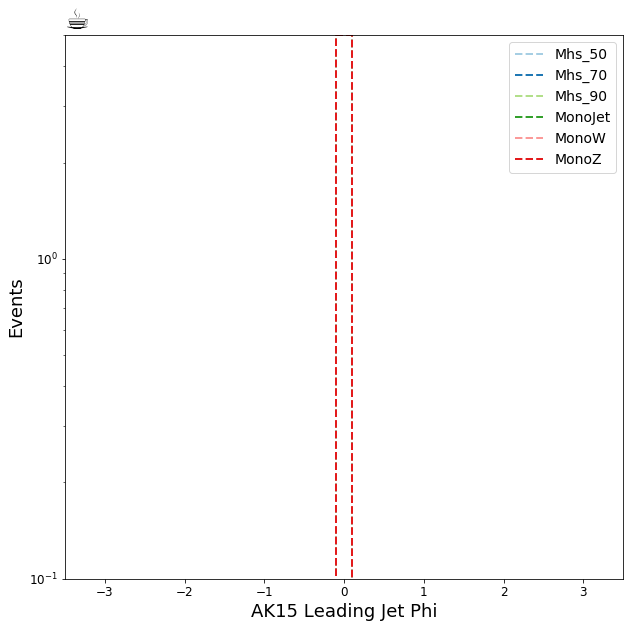

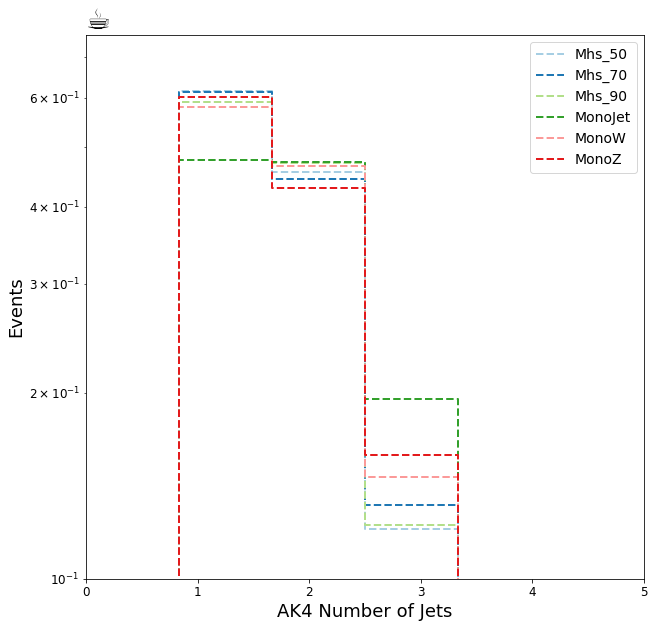

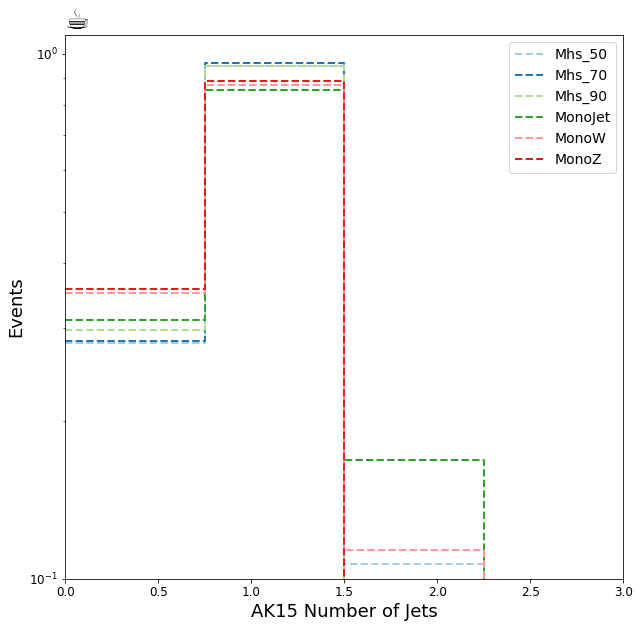

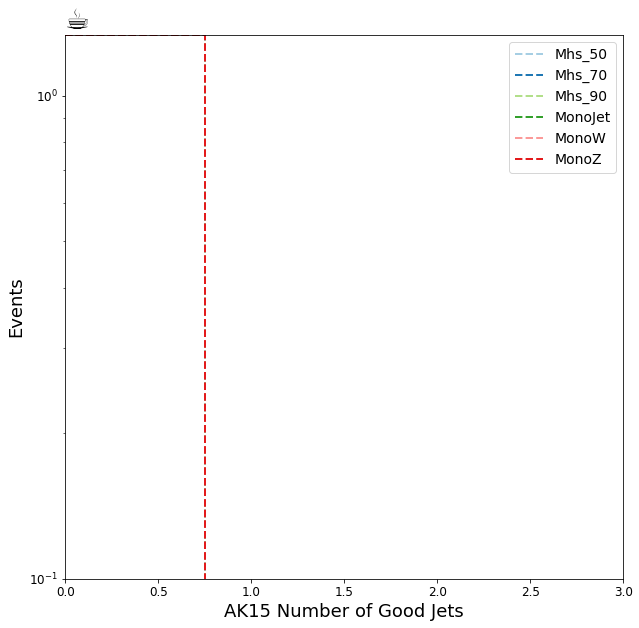

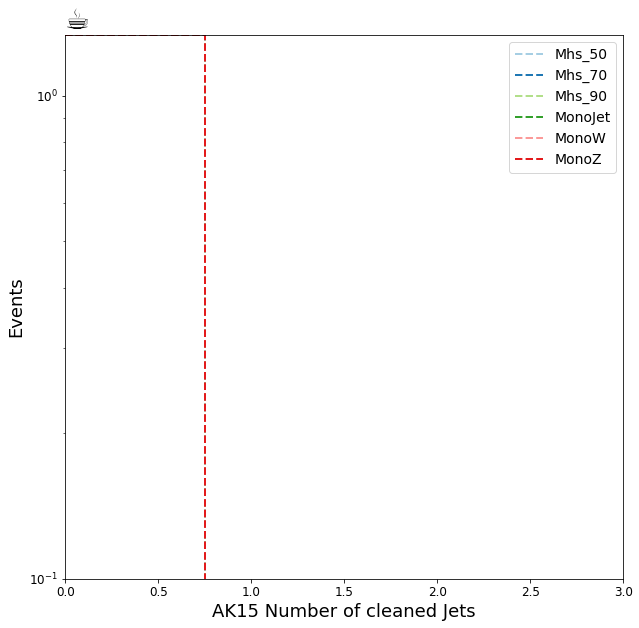

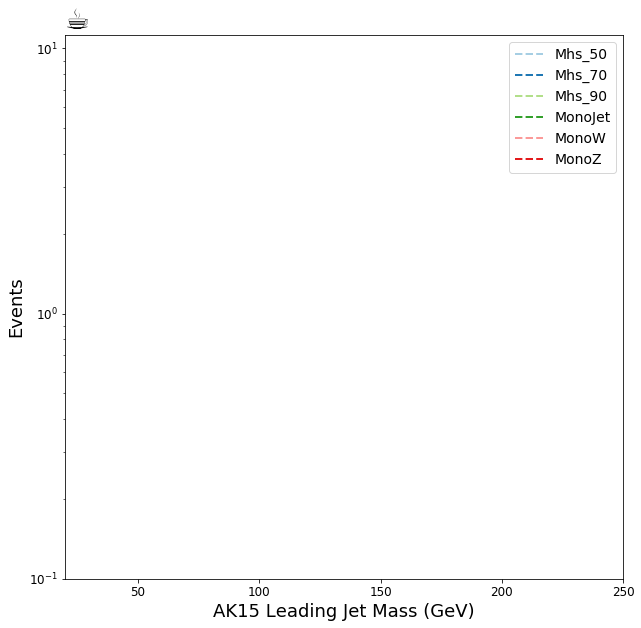

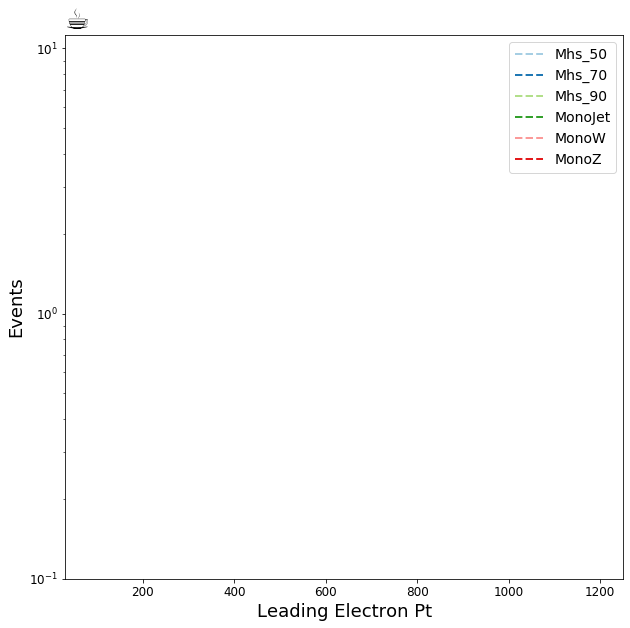

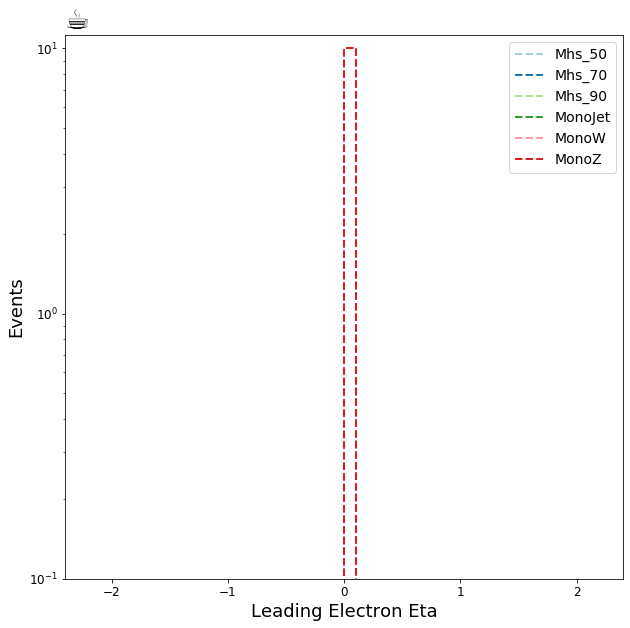

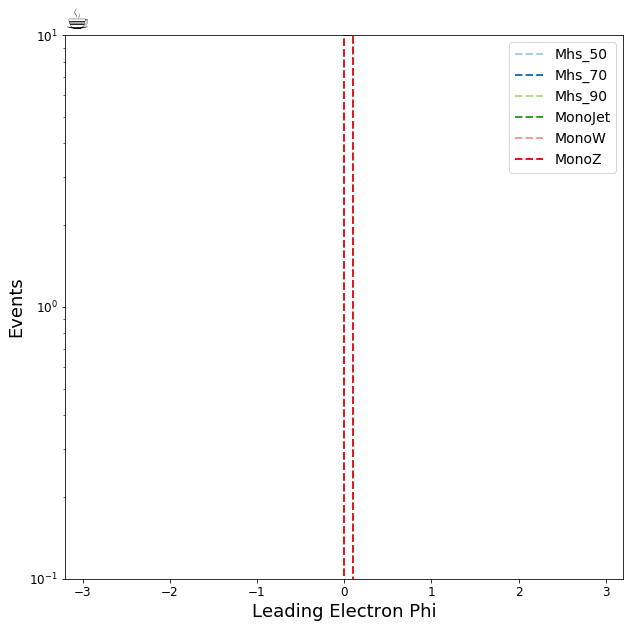

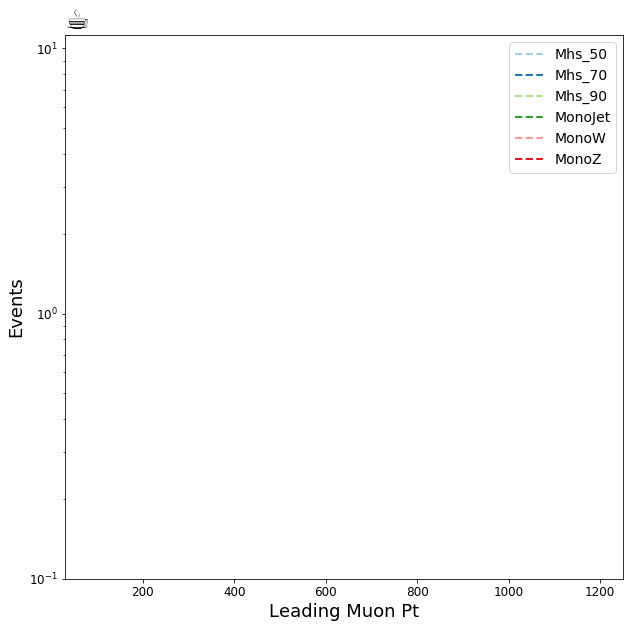

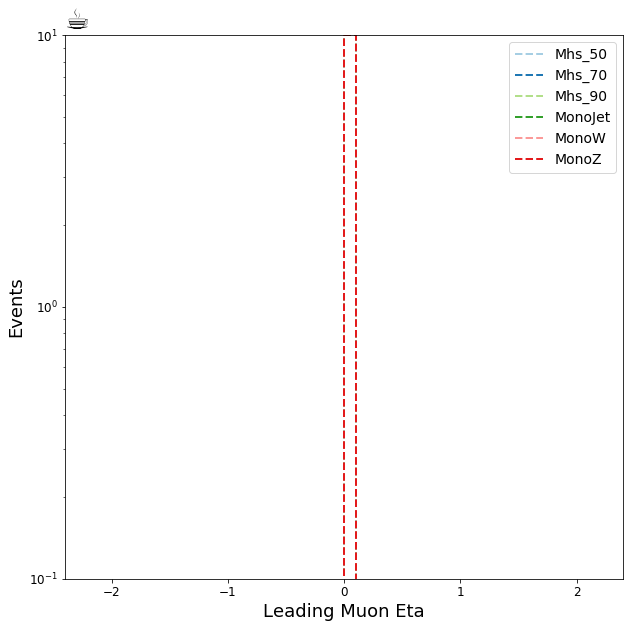

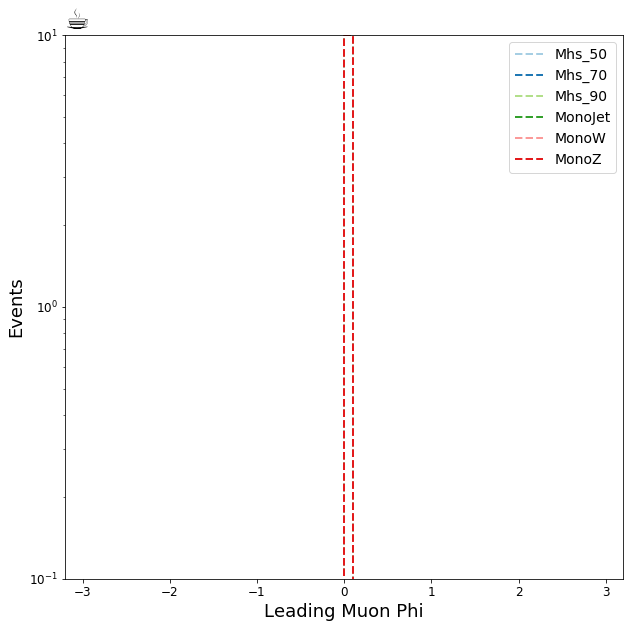

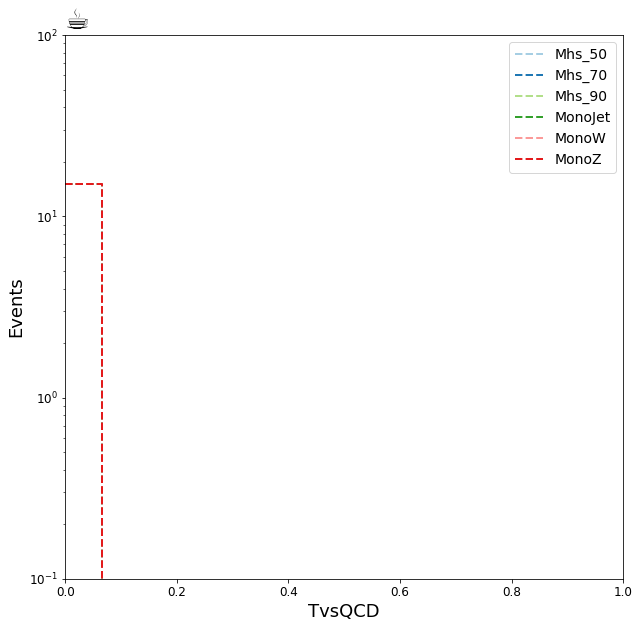

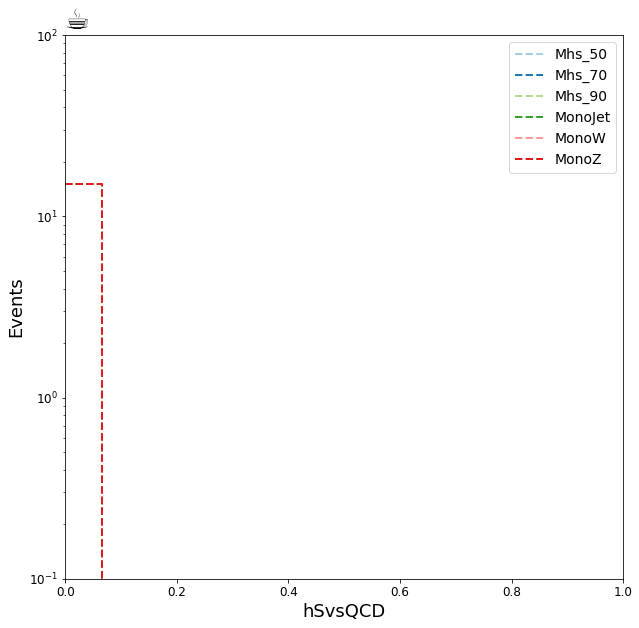

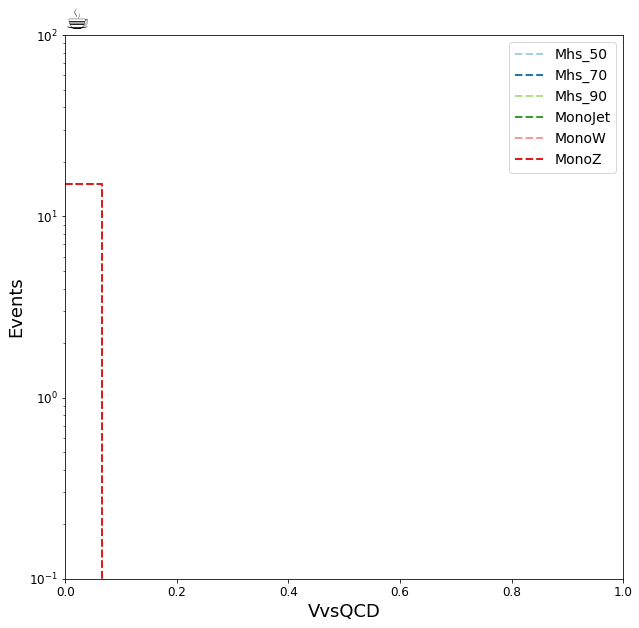

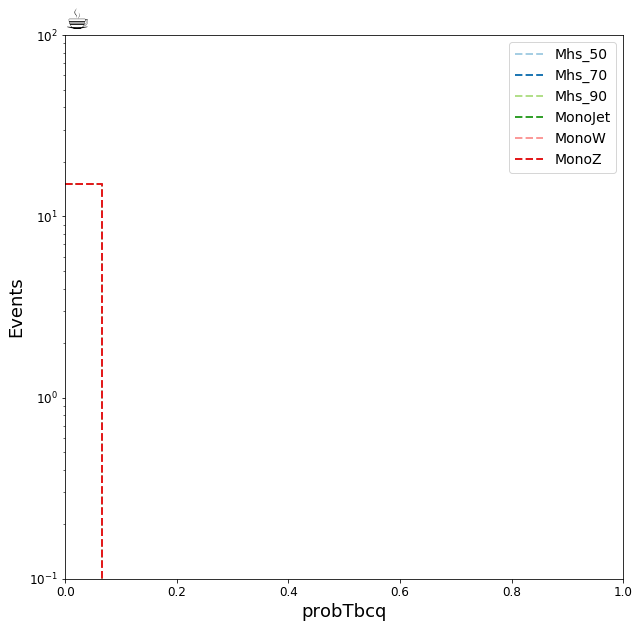

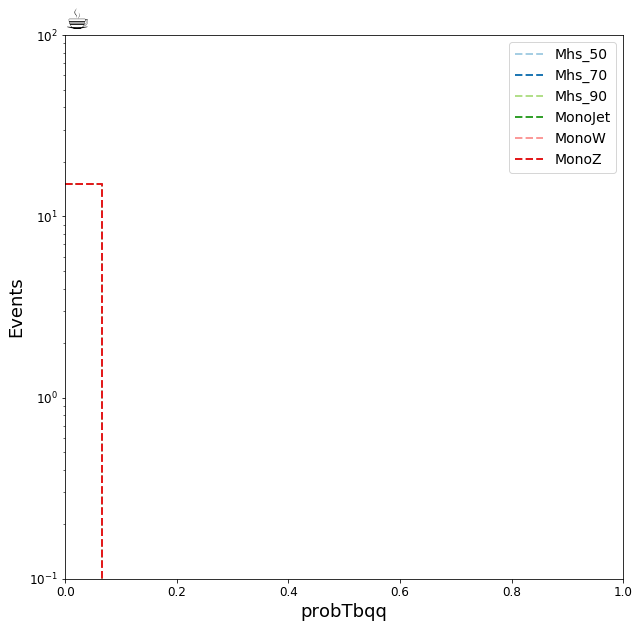

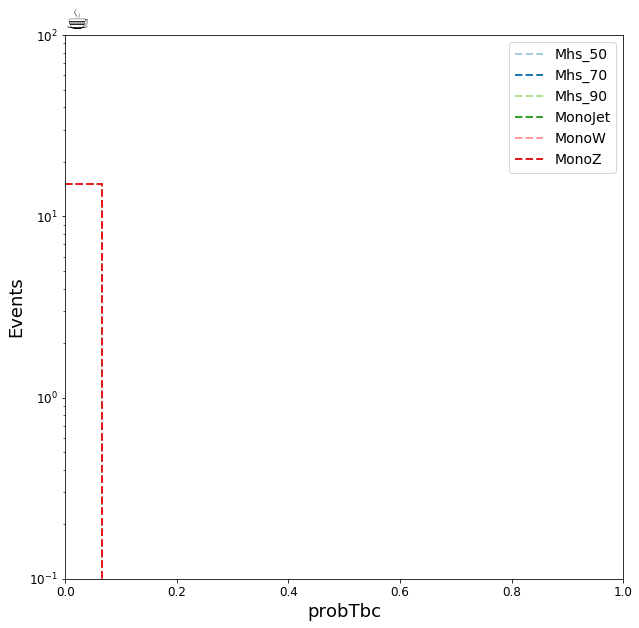

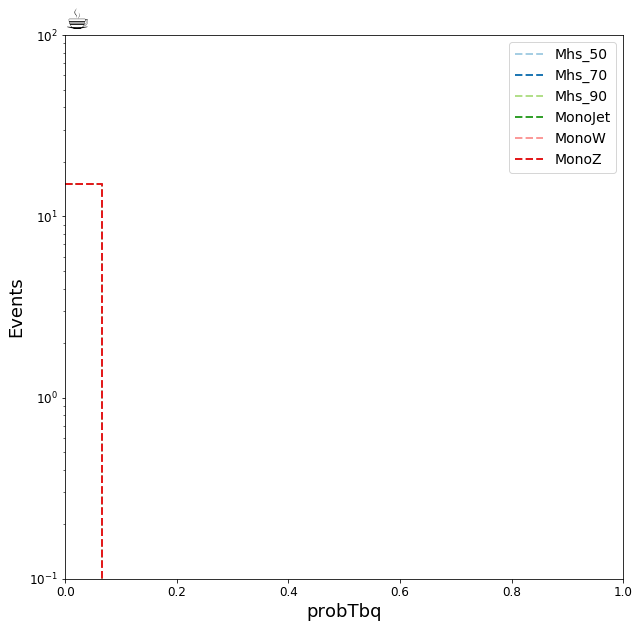

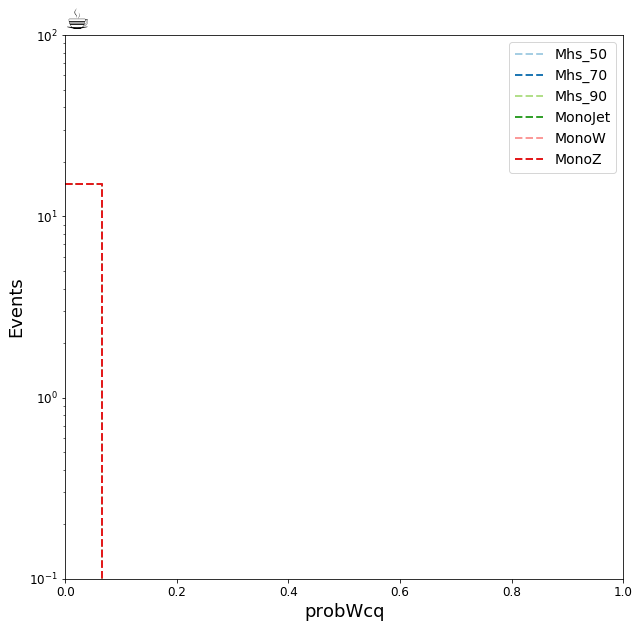

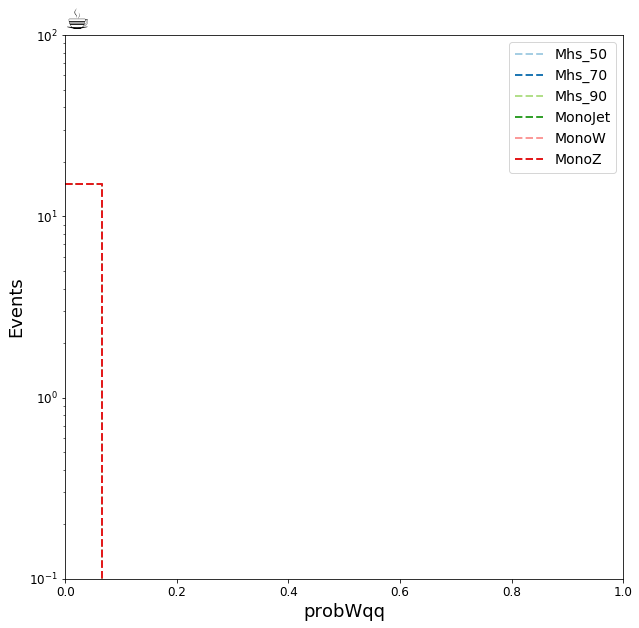

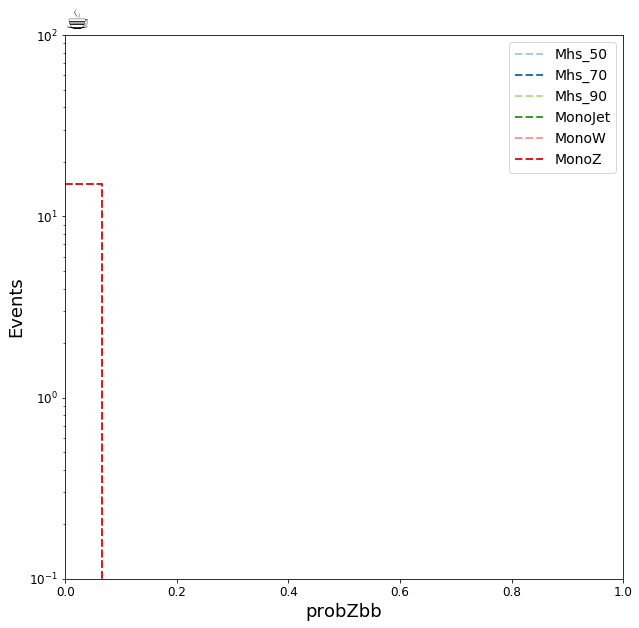

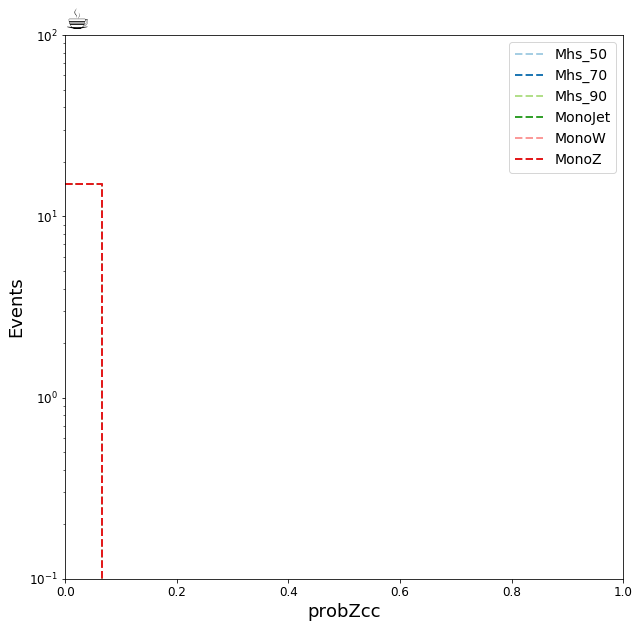

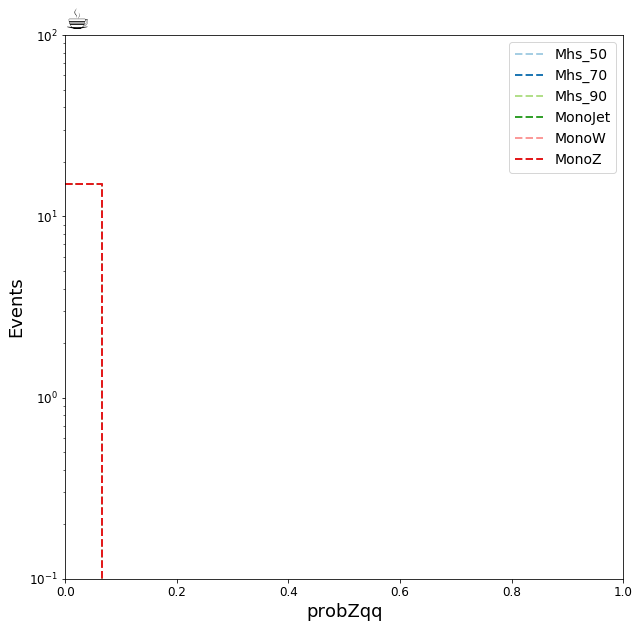

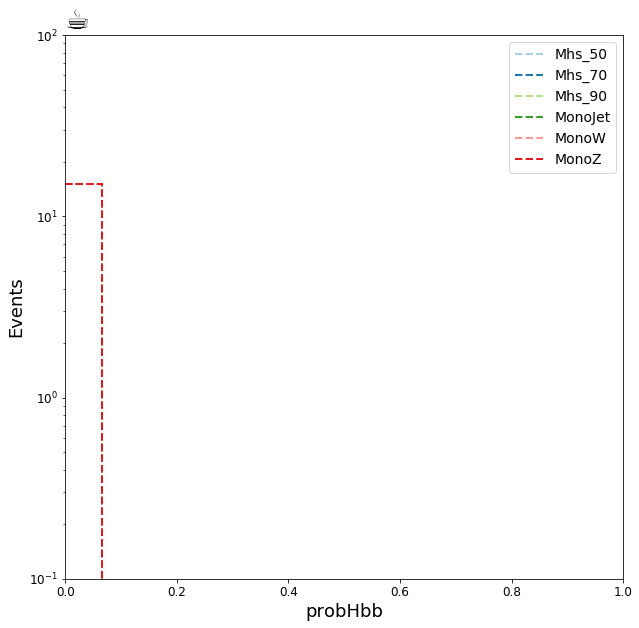

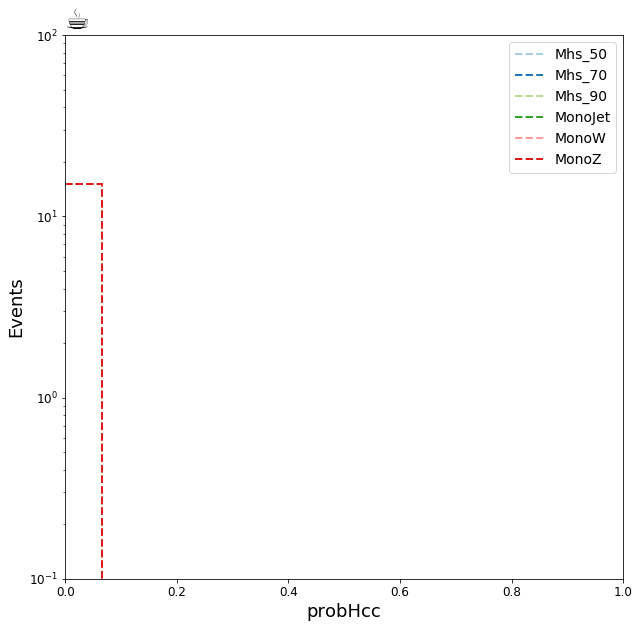

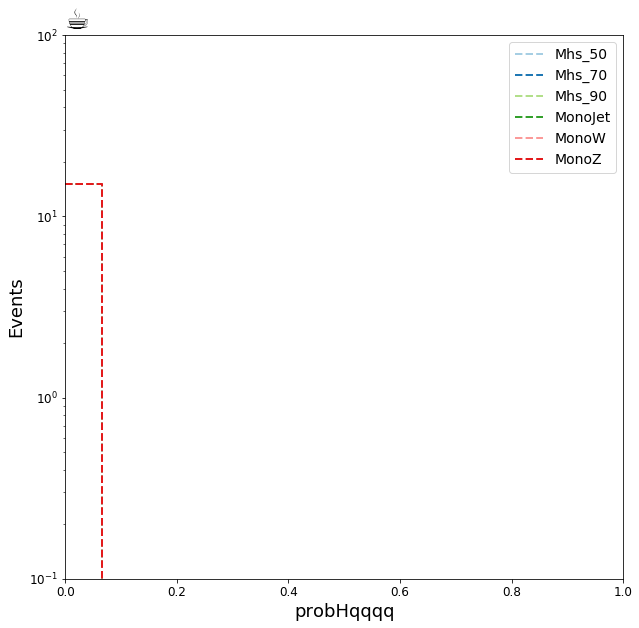

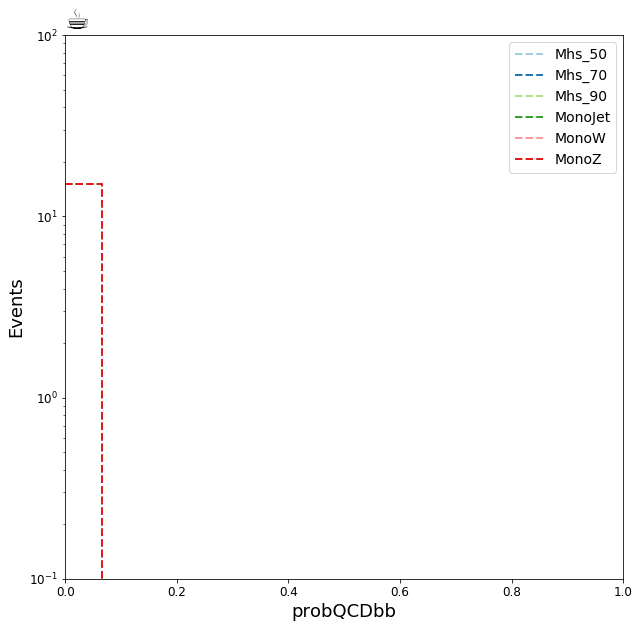

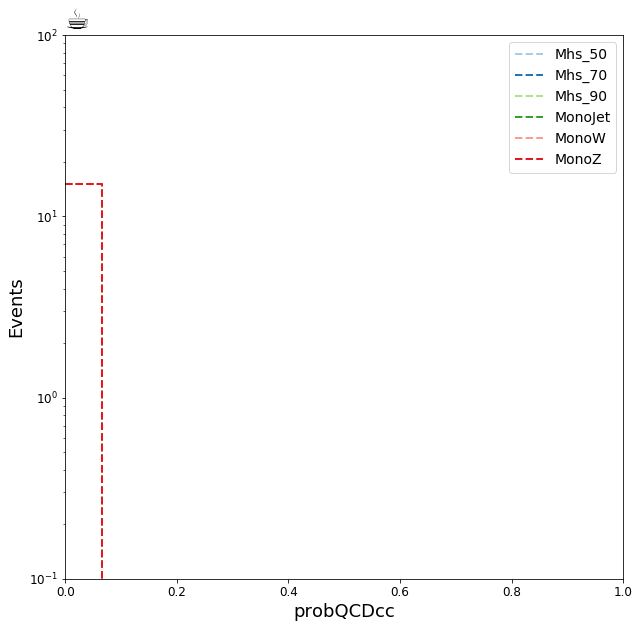

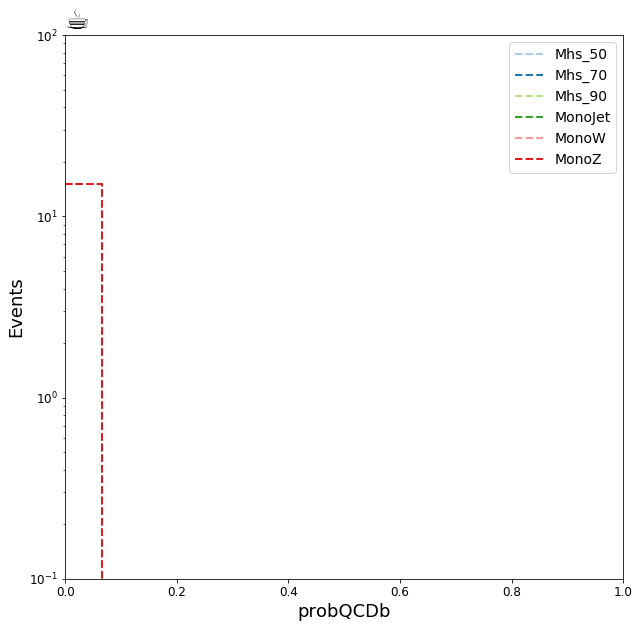

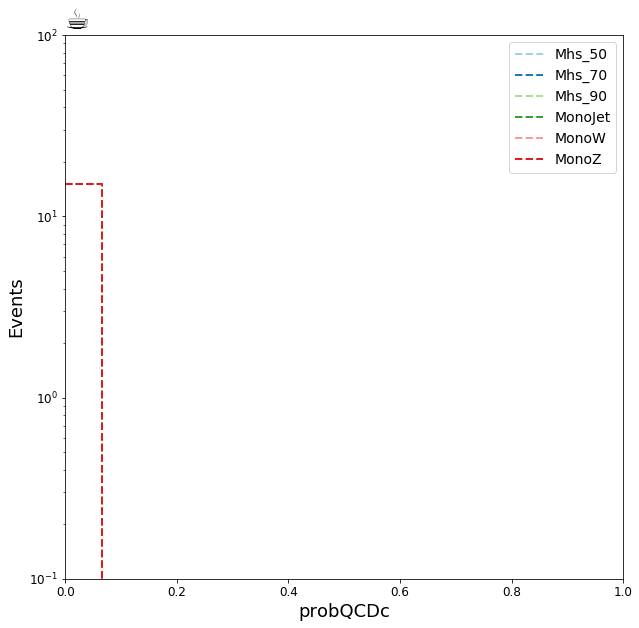

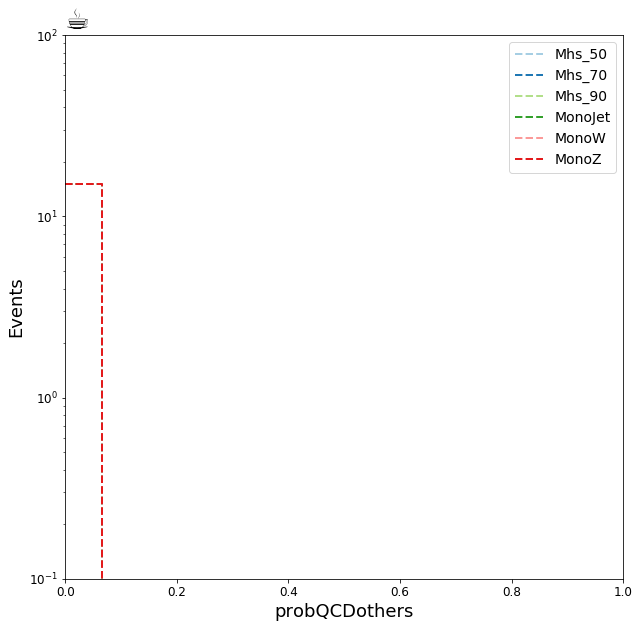

In [6]:
if not os.path.exists('unstack'):
    os.makedirs('unstack')


for key in hists.keys():
    if key=='sumw': continue
    
    args = {'linestyle':'--','linewidth':2}
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection','skinny').project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    plot.plot1d(signal_hists[key].project('jet_selection','skinny').project('region','iszeroL'), ax=ax, overlay="process", clear=False, stack=False, line_opts=args,density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))